<a href="https://colab.research.google.com/github/zahoororakzai11/Visualization/blob/main/Seaborn_Online_Retail_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graph to show in the jupyter notebook
%matplotlib inline

# set the seaborn graphs to a better style
sns.set(style= "ticks")

In [ ]:
# Online Retail Purchase

path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
online_rt = pd.read_csv(path,encoding = 'latin1')
online_rt.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


<ipython-input-8-7ee12b79ec92>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries = online_rt.groupby('Country').sum()


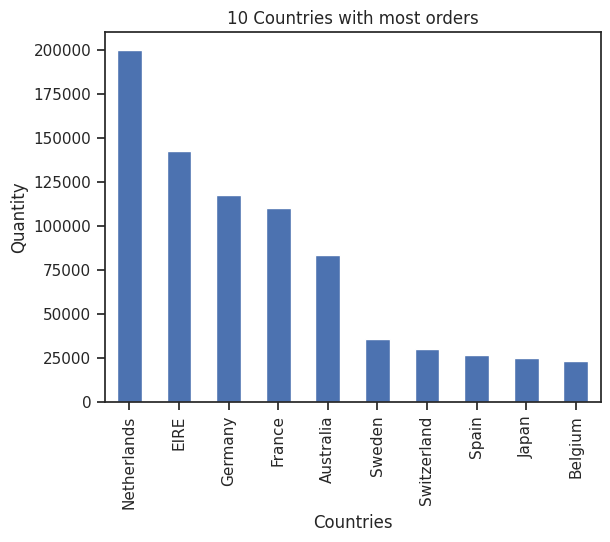

In [ ]:
#group by Country
countries = online_rt.groupby('Country').sum()

#sort the value and get the first 10 UK
countries = countries.sort_values(by='Quantity',ascending=False)[1:11]
#create the plot
countries['Quantity'].plot(kind= 'bar')
#set the title and lables
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title("10 Countries with most orders")
#show plot
plt.show()

In [ ]:
# Exclude negative Quantity entries
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


<ipython-input-21-91a2814e5b8e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers = online_rt.groupby(['CustomerID','Country']).sum()


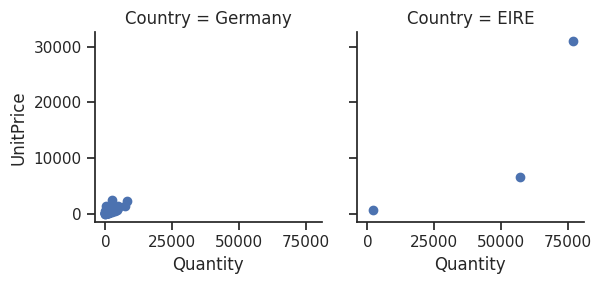

In [ ]:
# groupby for Customer ID
customers = online_rt.groupby(['CustomerID','Country']).sum()

#outlier with negative price
customers = customers[customers.UnitPrice > 0]

#get value of the index and put in columns
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_country = ['Netherland','EIRE','Germany']
#filte to just select one in the top_countries
customers = customers[customers['Country'].isin(top_country)]

#Create a FaceGrid
g = sns.FacetGrid(customers,col = 'Country')
# map over a make a scatterplot
g.map(plt.scatter,'Quantity','UnitPrice',alpha=1)

#add legend
g.add_legend()

In [ ]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)


top3 = sales_volume.index[1:4]
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')